In [1]:
import numpy as np 
import pandas as pd
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 


In [2]:
cwd = os.chdir("/Users/jackcarter/Documents/Data_Mixtures")
df1 = pd.read_csv("Kula_1_data.csv",
                  engine = 'python')
df1.dropna(axis =0, how = 'all')
df2 = pd.read_csv("Kula_2_data.csv",
                  engine = 'python')
df2.dropna(axis =0, how = 'all')
df3 = pd.read_csv("Kula_3_data.csv",
                  engine = 'python')
df3.dropna(axis =0, how = 'all');

In [3]:
df1.shape

(15, 6)

In [4]:
kula1_ar39 = df1['39Ar'].values
kula1_temp = df1['Temp'].values
kula1_time = df1['Time'].values


kula2_ar39 = df2['39Ar'].values
kula2_temp = df2['Temp'].values
kula2_time = df2['Time'].values


kula3_ar39 = df3['39Ar'].values
kula3_temp = df3['Temp'].values
kula3_time = df3['Time'].values

In [5]:
def FechKal(x,y): 
    da2 = []
    y = y*60
    x_cumulative = np.cumsum(x)
    time_c = np.cumsum(y)
    x_cumulative_with_zero = np.insert(x_cumulative,
                                       0, 0)

    f_x = x_cumulative/x_cumulative.max()
    
    deltat = time_c[1:-1] - time_c[0:-2]
    
    da2_a = np.zeros([len(x)])
    da2_a[0] = (((f_x[0]**2 - 0**2))*np.pi)/(36*(deltat[0]))
    
    da2_a = ((f_x[1:-1]**2 - f_x[0:-2]**2)*np.pi)/(36*deltat)
    
    
    #da2_b = np.zeros([len(x)])
    #da2_b = (1/((np.pi* np.pi *deltat)))\
    #*((-(np.pi* np.pi))*f_x[1:-1] - f_x[0:-2])/3 - \
    #(2*np.pi)*(np.sqrt(1 - (np.pi/3)*f_x[1:-1]) - \
     #         np.sqrt(1 - (np.pi/3)*f_x[0:-2]))
    
    
     # Equation 2
    da2_b = np.zeros([len(x)])
    dif_f = f_x[1:-1] - f_x[0:-2]
    da2_b = (1/((np.pi**2)*deltat))*(-(np.pi*np.pi/3)*dif_f -
                                             (2*np.pi)*(np.sqrt(1 -(np.pi/3)*f_x[1:-1]) - np.sqrt(1 - (np.pi/3)*f_x[0:-2])))
    
    
    
    da2_c = np.zeros([len(x)])
    da2_c = (1/(np.pi*np.pi*deltat))*\
    np.log((1 - f_x[0:-2])/(1 - f_x[1:-1]))
    
    
    ka = f_x[(f_x <= 0.1) & (f_x > 0)]
    kb = f_x[(f_x > 0.1) & (f_x <= 0.9)]
    kc = f_x[(f_x > 0.9) & (f_x <= 1)]
    
    na = len(ka)
    nb = len(kb)
    nc = len(kc)
    
    a = da2_a[:na]
    b = da2_b[na:(nb + na)]
    c = da2_c[-nc:]
    da2.extend(a)
    da2.extend(b)
    da2.extend(c)
    
    return da2
    

In [6]:
kula1_da2 = FechKal(kula1_ar39, kula1_time)
tplot = 10000/(kula1_temp + 273.15)
kula1_da2_plot = np.log(kula1_da2)


kula2_da2 = FechKal(kula2_ar39, kula2_time)
tplot2 = 10000/(kula2_temp + 273.15)
kula2_da2_plot = np.log(kula2_da2)


kula3_da2 = FechKal(kula3_ar39, kula3_time)
tplot3 = 10000/(kula3_temp + 273.15)
kula3_da2_plot = np.log(kula3_da2)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


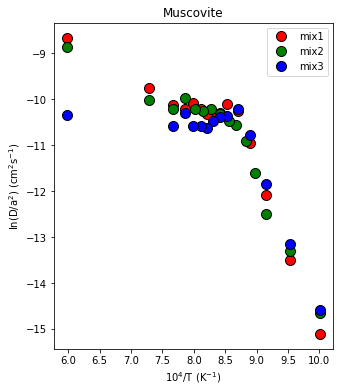

In [7]:
plt.figure(figsize = (5,6))

tplot = 10000/(kula1_temp + 273.15)
kula1_da2_plot = np.log(kula1_da2)

plt.plot(tplot, kula1_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1')

plt.plot(tplot2, kula2_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2')


plt.plot(tplot3, kula3_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3')

plt.legend();
plt.title('Muscovite');

plt.xlabel('10$^{4}$/T (K$^{-1}$)');
plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');

In [8]:
cwd = os.chdir("/Users/jackcarter/Documents/Data_Mixtures")
df4 = pd.read_csv("Kula_4_data.csv",
                  engine = 'python')
df4.dropna(axis =0, how = 'all')
df5 = pd.read_csv("Kula_5_data.csv",
                  engine = 'python')
df5.dropna(axis =0, how = 'all')
df6 = pd.read_csv("Kula_6_data.csv",
                  engine = 'python')
df6.dropna(axis =0, how = 'all');

In [9]:
kula4_ar39 = df4['39Ar'].values
kula4_temp = df4['Temp'].values
kula4_time = df4['Time'].values


kula5_ar39 = df5['39Ar'].values
kula5_temp = df5['Temp'].values
kula5_time = df5['Time'].values


kula6_ar39 = df6['39Ar'].values
kula6_temp = df6['Temp'].values
kula6_time = df6['Time'].values

In [10]:
kula4_da2 = FechKal(kula4_ar39, kula4_time)
tplot4 = 10000/(kula4_temp + 273.15)
kula4_da2_plot = np.log(kula4_da2)


kula5_da2 = FechKal(kula5_ar39, kula5_time)
tplot5 = 10000/(kula5_temp + 273.15)
kula5_da2_plot = np.log(kula5_da2)


kula6_da2 = FechKal(kula6_ar39, kula6_time)
tplot6 = 10000/(kula6_temp + 273.15)
kula6_da2_plot = np.log(kula6_da2)

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


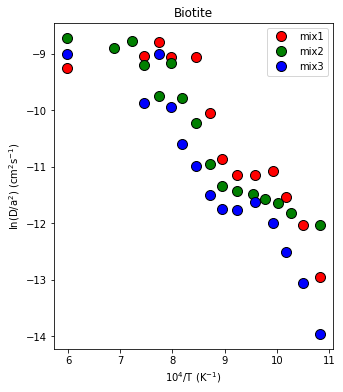

In [11]:
plt.figure(figsize = (5,6))



plt.plot(tplot4, kula4_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1')

plt.plot(tplot5, kula5_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2')


plt.plot(tplot6, kula6_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3')

plt.legend();
plt.title('Biotite');

plt.xlabel('10$^{4}$/T (K$^{-1}$)');
plt.ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');

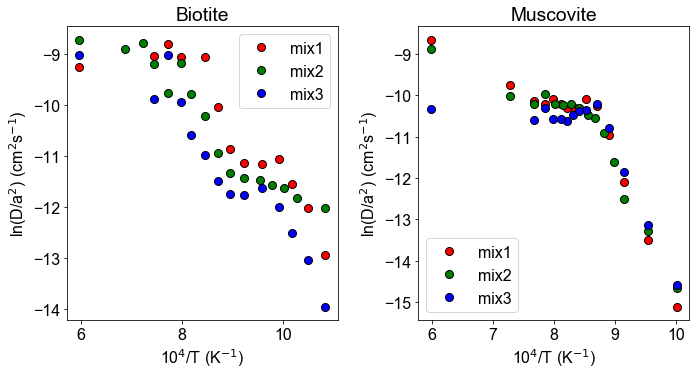

In [12]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

plt.rc('font', **font)

fig, ax = plt.subplots(1,2, figsize = (10, 5.5))
ax[0].plot(tplot4, kula4_da2_plot, 'or', 
        markersize = 8, markeredgecolor = 'k', 
        label = 'mix1')

ax[0].plot(tplot5, kula5_da2_plot, 'og', 
        markersize = 8, markeredgecolor = 'k', 
        label = 'mix2')


ax[0].plot(tplot6, kula6_da2_plot, 'ob', 
        markersize = 8, markeredgecolor = 'k', 
        label= 'mix3')

ax[0].legend();
ax[0].set_title('Biotite');

ax[0].set_xlabel('10$^{4}$/T (K$^{-1}$)');
ax[0].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');



ax[1].plot(tplot, kula1_da2_plot, 'or', 
        markersize = 8, markeredgecolor = 'k', 
        label = 'mix1')

ax[1].plot(tplot2, kula2_da2_plot, 'og', 
        markersize = 8, markeredgecolor = 'k', 
        label = 'mix2')


ax[1].plot(tplot3, kula3_da2_plot, 'ob', 
        markersize = 8, markeredgecolor = 'k', 
        label= 'mix3')

ax[1].legend();
ax[1].set_title('Muscovite');

ax[1].set_xlabel('10$^{4}$/T (K$^{-1}$)');
ax[1].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');

plt.tight_layout()

plt.savefig('Arrhenius_kula_all.pdf')

In [13]:
dfkula = pd.read_csv('Kula_Individual.csv', engine = 'python')

In [14]:
ar39_ny25 = dfkula['Ar39_ny25'].values
temp_ny25 = dfkula['Temp_ny25'].values
time_ny25 = dfkula['Time_ny25'].values 

ar39_ny25 = ar39_ny25[~np.isnan(ar39_ny25)]
temp_ny25 = temp_ny25[~np.isnan(temp_ny25)]
time_ny25 = time_ny25[~np.isnan(time_ny25)]*60



In [15]:
ar39_iv14 = dfkula['Ar39_iv14'].values
temp_iv14 = dfkula['Temp_iv14'].values
time_iv14 = dfkula['Time_iv14'].values*60


In [16]:
ar39_pm1 = dfkula['Ar39_pm1'].values
temp_pm1 = dfkula['Temp_pm1'].values
time_pm1 = dfkula['Time_pm1'].values

ar39_pm1 = ar39_pm1[~np.isnan(ar39_pm1)]
temp_pm1 = temp_pm1[~np.isnan(temp_pm1)]
time_pm1 = time_pm1[~np.isnan(time_pm1)]*60

In [17]:
ar39_iv8 = dfkula['Ar39_iv8'].values
temp_iv8 = dfkula['Temp_iv8'].values
time_iv8 = dfkula['Time_iv8'].values

ar39_iv8 = ar39_iv8[~np.isnan(ar39_iv8)]
temp_iv8 = temp_iv8[~np.isnan(temp_iv8)]
time_iv8 = time_iv8[~np.isnan(time_iv8)]*60

In [18]:
kula_ny25 = FechKal(ar39_ny25, time_ny25)
tplot_ny25 = 10000/(temp_ny25 + 273.15)
kula_ny25_da2_plot = np.log(kula_ny25)


kula_iv14 = FechKal(ar39_iv14, time_iv14)
tplot_iv14 = 10000/(temp_iv14 + 273.15)
kula_iv14_da2_plot = np.log(kula_iv14)


kula_pm1 = FechKal(ar39_pm1, time_pm1)
tplot_pm1 = 10000/(temp_pm1 + 273.15)
kula_pm1_da2_plot = np.log(kula_pm1)


kula_iv8 = FechKal(ar39_iv8, time_iv8)
tplot_iv8 = 10000/(temp_iv8 + 273.15)
kula_iv8_da2_plot = np.log(kula_iv8)



/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in sqrt


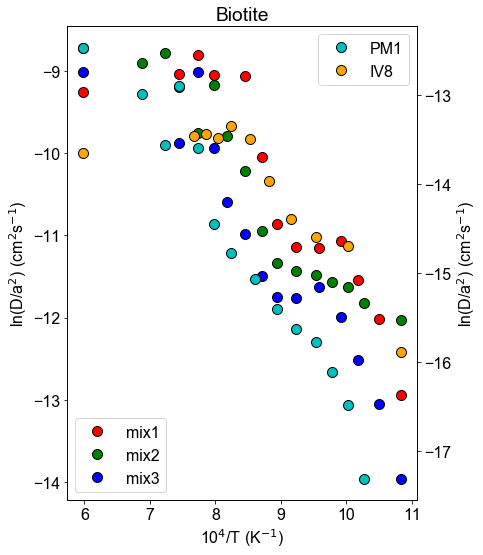

In [19]:
fig, ax = plt.subplots(figsize = (7,8))

axx = ax

ax.plot(tplot4, kula4_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1')

ax.plot(tplot5, kula5_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2')


plt.plot(tplot6, kula6_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3')

axy = ax.twinx()

axy.plot(tplot_pm1, kula_pm1_da2_plot , marker ='o',  linewidth = 0,
         color = 'c',
        markersize = 10, markeredgecolor = 'k', 
        label= 'PM1' )


axy.plot(tplot_iv8, kula_iv8_da2_plot, marker = 'o', linewidth = 0,
         color = 'orange',
        markersize = 10, markeredgecolor = 'k', 
        label= 'IV8' )

axy.legend();
axx.legend(loc = 3); 
plt.title('Biotite');

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)');
axy.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');
axx.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');
plt.tight_layout(); 
plt.savefig('Biotite_with_individual.pdf')

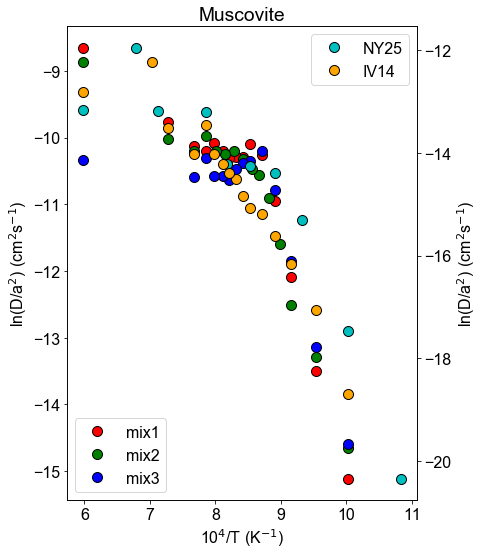

In [20]:
fig, ax = plt.subplots(figsize = (7,8))

axx = ax

tplot = 10000/(kula1_temp + 273.15)
kula1_da2_plot = np.log(kula1_da2)

ax.plot(tplot, kula1_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1')

ax.plot(tplot2, kula2_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2')


ax.plot(tplot3, kula3_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3')

axy = ax.twinx()

axy.plot(tplot_ny25, kula_ny25_da2_plot , marker ='o',  linewidth = 0,
         color = 'c',
        markersize = 10, markeredgecolor = 'k', 
        label= 'NY25' )


axy.plot(tplot_iv14, kula_iv14_da2_plot , marker = 'o', linewidth = 0,
         color = 'orange',
        markersize = 10, markeredgecolor = 'k', 
        label= 'IV14' )

axy.legend();
axx.legend(loc = 3)
plt.title('Muscovite');

ax.set_xlabel('10$^{4}$/T (K$^{-1}$)');
axy.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');
axx.set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');
plt.tight_layout(); 
plt.savefig('Muscovite_with_individual.pdf')

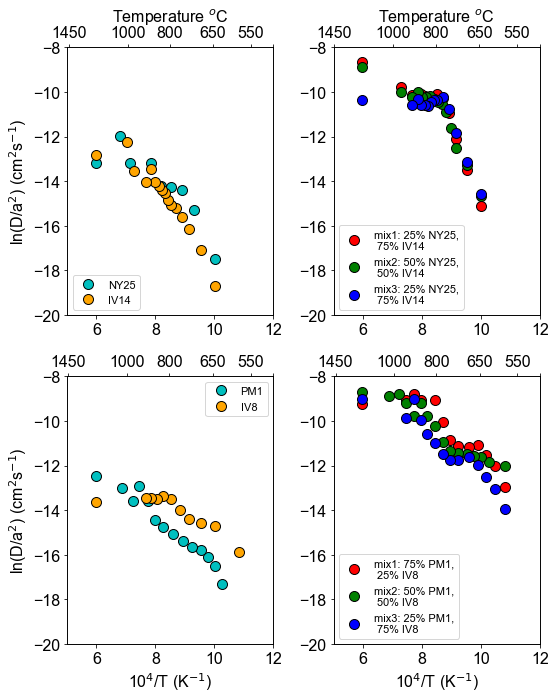

In [25]:
fig, ax = plt.subplots(2,2, figsize = (8,10))


ax[0,1].plot(tplot, kula1_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1: 25% NY25,\n 75% IV14')

ax[0,1].plot(tplot2, kula2_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2: 50% NY25,\n 50% IV14')


ax[0,1].plot(tplot3, kula3_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3: 25% NY25,\n 75% IV14')



ax[0,0].plot(tplot_ny25, kula_ny25_da2_plot , marker ='o',  linewidth = 0,
         color = 'c',
        markersize = 10, markeredgecolor = 'k', 
        label= 'NY25' )


ax[0,0].plot(tplot_iv14, kula_iv14_da2_plot , marker = 'o', linewidth = 0,
         color = 'orange',
        markersize = 10, markeredgecolor = 'k', 
        label= 'IV14' )


ax[1,1].plot(tplot4, kula4_da2_plot, 'or', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix1: 75% PM1,\n 25% IV8')

ax[1,1].plot(tplot5, kula5_da2_plot, 'og', 
        markersize = 10, markeredgecolor = 'k', 
        label = 'mix2: 50% PM1,\n 50% IV8')

ax[1,1].plot(tplot6, kula6_da2_plot, 'ob', 
        markersize = 10, markeredgecolor = 'k', 
        label= 'mix3: 25% PM1,\n 75% IV8')





ax[1,0].plot(tplot_pm1, kula_pm1_da2_plot , marker ='o',  linewidth = 0,
         color = 'c',
        markersize = 10, markeredgecolor = 'k', 
        label= 'PM1' )


ax[1,0].plot(tplot_iv8, kula_iv8_da2_plot, marker = 'o', linewidth = 0,
         color = 'orange',
        markersize = 10, markeredgecolor = 'k', 
        label= 'IV8' )


ax[1,0].set_xlabel('10$^{4}$/T (K$^{-1}$)');
ax[1,1].set_xlabel('10$^{4}$/T (K$^{-1}$)');

ax[1,0].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');
ax[0,0].set_ylabel('ln(D/a$^{2}$) (cm$^{2}$s$^{-1}$)');


ax[0,0].legend(loc = 3, fontsize = 11)
ax[1,0].legend(fontsize = 11)
ax[0,1].legend(fontsize = 11)
ax[1,1].legend(fontsize = 11)

ax[0,0].locator_params(axis='y', nbins=6)
ax[0,0].locator_params(axis='x', nbins=6)

ax[1,0].locator_params(axis='y', nbins=6)
ax[1,0].locator_params(axis='x', nbins=6)

ax[0,1].locator_params(axis='y', nbins=10)
ax[0,1].locator_params(axis='x', nbins=6)

ax[1,1].locator_params(axis='y', nbins=6)
ax[1,1].locator_params(axis='x', nbins=6)



ax2 = ax[1,1].twiny()

Tdc = np.array([500,550, 650, 800, 1000, 1450])
Tp = 10000/(Tdc + 273.15)
labels = list(['','550', '650', '800', '1000', '1450'])
ax2.plot(tplot4, kula4_da2_plot, alpha = 0)

ax2.set_xticks(Tp)
ax2.set_xticklabels(labels)


ax3 = ax[0,0].twiny()

Tdc = np.array([500,550, 650, 800, 1000, 1450])
Tp = 10000/(Tdc + 273.15)
labels = list(['','550', '650', '800', '1000', '1450'])
ax3.plot(tplot_ny25, kula_ny25_da2_plot,alpha = 0)

ax3.set_xticks(Tp)
ax3.set_xticklabels(labels)


ax4 = ax[0,1].twiny()

Tdc = np.array([500,550, 650, 800, 1000, 1450])
Tp = 10000/(Tdc + 273.15)
labels = list(['','550', '650', '800', '1000', '1450'])
ax4.plot(tplot, kula1_da2_plot,alpha = 0)

ax4.set_xticks(Tp)
ax4.set_xticklabels(labels)


ax5 = ax[1,0].twiny()

Tdc = np.array([500,550, 650, 800, 1000, 1450])
Tp = 10000/(Tdc + 273.15)
labels = list(['','550', '650', '800', '1000', '1450'])
ax5.plot(tplot_pm1, kula_pm1_da2_plot ,alpha = 0)

ax5.set_xticks(Tp)
ax5.set_xticklabels(labels)

ax3.set_xlabel('Temperature $^{o}$C')
ax4.set_xlabel('Temperature $^{o}$C')


ax[0,0].set_xlim(5, 12)
ax[1,0].set_xlim(5, 12)
ax[1,1].set_xlim(5, 12)
ax[0,1].set_xlim(5, 12)


ax[0,0].set_ylim(-20, -8)
ax[1,0].set_ylim(-20, -8)
ax[1,1].set_ylim(-20, -8)
ax[0,1].set_ylim(-20, -8)

plt.tight_layout()








plt.savefig('ArrheniusKula.pdf')